In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [5]:
raw_data = pd.read_csv("Coca-Cola_stock_history.csv")
df_fullstock = raw_data.copy()
df_fullstock.Date = pd.to_datetime(df_fullstock.Date, dayfirst=True)
df_fullstock.set_index("Date", inplace=True)
df_fullstock = df_fullstock.asfreq('b')

In [6]:
df_fullstock['stock_high'] = df_fullstock.High

In [7]:
size = int(len(df_fullstock)*0.8)
df, df_test = df_fullstock.iloc[:size], df_fullstock.iloc[size:]

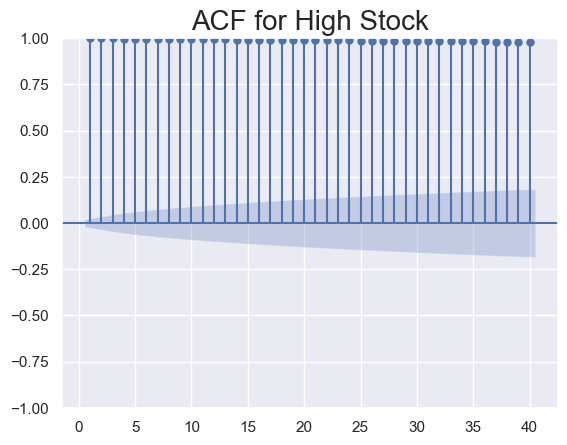

In [7]:
#AR Model

#ACF
sgt.plot_acf(df.stock_high, zero=False, lags=40)
plt.title("ACF for High Stock", size=20)
plt.show()

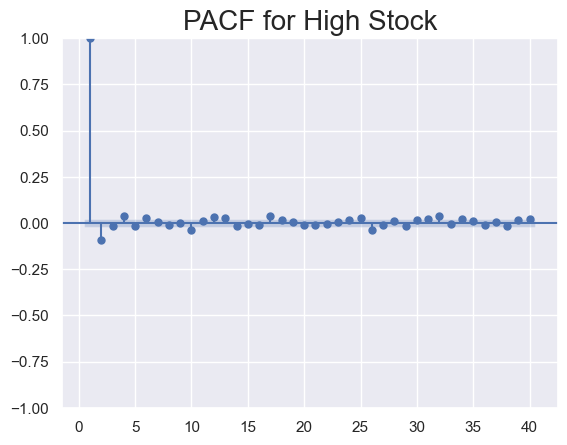

In [8]:
#PACF
sgt.plot_pacf(df.stock_high, zero=False, lags=40, method=('ols'))
plt.title("PACF for High Stock", size=20)
plt.show()

In [29]:
#AR(1) Model

model_ar = ARIMA(df.stock_high, order=(1,0,0))

In [30]:
results_ar = model_ar.fit()

In [31]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             stock_high   No. Observations:                 8749
Model:                 ARIMA(1, 0, 0)   Log Likelihood                4621.930
Date:                Mon, 07 Aug 2023   AIC                          -9237.861
Time:                        06:16:57   BIC                          -9216.630
Sample:                    01-02-1962   HQIC                         -9230.626
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4077     91.070      0.059      0.953    -173.087     183.902
ar.L1          1.0000   9.25e-05   1.08e+04      0.000       1.000       1.000
sigma2         0.0203   8.31e-05    244.765      0.000       0.020       0.020
===================================================================================
Ljung-Box (L1) (Q):                  70.12   Jarque-Bera (JB):            236177.73
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):            5546.34   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
#AR Model with several lags

model_ar2 = ARIMA(df.stock_high, order=(2,0,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             stock_high   No. Observations:                 8749
Model:                 ARIMA(2, 0, 0)   Log Likelihood                4657.677
Date:                Mon, 07 Aug 2023   AIC                          -9307.355
Time:                        06:17:04   BIC                          -9279.048
Sample:                    01-02-1962   HQIC                         -9297.709
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4077     77.243      0.070      0.944    -145.986     156.802
ar.L1          1.0897      0.005    230.903      0.000       1.080       1.099
ar.L2         -0.0898      0.005    -19.066      0.000      -0.099      -0.081
sigma2         0.0202   8.43e-05    239.175      0.000       0.020       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            231241.81
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):            5207.15   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
model_ar3 = ARIMA(df.stock_high, order=(3,0,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             stock_high   No. Observations:                 8749
Model:                 ARIMA(3, 0, 0)   Log Likelihood                4659.023
Date:                Mon, 07 Aug 2023   AIC                          -9308.045
Time:                        06:17:08   BIC                          -9272.662
Sample:                    01-02-1962   HQIC                         -9295.988
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4077     74.254      0.073      0.942    -140.127     150.942
ar.L1          1.0882      0.005    227.716      0.000       1.079       1.098
ar.L2         -0.0709      0.007    -10.303      0.000      -0.084      -0.057
ar.L3         -0.0173      0.004     -3.943      0.000      -0.026      -0.009
sigma2         0.0202   8.53e-05    236.376      0.000       0.020       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            229517.37
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):            5133.68   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
#LLR Test

def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [35]:
LLR_test(model_ar2, model_ar3)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.101

In [36]:
model_ar4 = ARIMA(df.stock_high, order=(4,0,0))
results_ar4 = model_ar4.fit()
print(results_ar4.summary())
print("LLR Test: " + str(LLR_test(model_ar3, model_ar4)))

                               SARIMAX Results                                
Dep. Variable:             stock_high   No. Observations:                 8749
Model:                 ARIMA(4, 0, 0)   Log Likelihood                4665.811
Date:                Mon, 07 Aug 2023   AIC                          -9319.622
Time:                        06:17:22   BIC                          -9277.162
Sample:                    01-02-1962   HQIC                         -9305.154
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4077     78.275      0.069      0.945    -148.009     158.824
ar.L1          1.0888      0.005    228.817      0.000       1.080       1.098
ar.L2         -0.0681      0.007     -9.903      0.0

In [37]:
model_ar5 = ARIMA(df.stock_high, order=(5,0,0))
results_ar5 = model_ar5.fit()
print(results_ar5.summary())
print("LLR Test: " + str(LLR_test(model_ar4, model_ar5)))

                               SARIMAX Results                                
Dep. Variable:             stock_high   No. Observations:                 8749
Model:                 ARIMA(5, 0, 0)   Log Likelihood                4667.305
Date:                Mon, 07 Aug 2023   AIC                          -9320.609
Time:                        06:17:34   BIC                          -9271.072
Sample:                    01-02-1962   HQIC                         -9303.729
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4077     78.149      0.069      0.945    -147.762     158.577
ar.L1          1.0896      0.005    227.523      0.000       1.080       1.099
ar.L2         -0.0692      0.007    -10.008      0.0

In [38]:
model_ar6 = ARIMA(df.stock_high, order=(6,0,0))
results_ar6 = model_ar6.fit()
print(results_ar6.summary())
print("LLR Test: " + str(LLR_test(model_ar5, model_ar6)))

                               SARIMAX Results                                
Dep. Variable:             stock_high   No. Observations:                 8749
Model:                 ARIMA(6, 0, 0)   Log Likelihood                4670.647
Date:                Mon, 07 Aug 2023   AIC                          -9325.294
Time:                        06:17:53   BIC                          -9268.681
Sample:                    01-02-1962   HQIC                         -9306.003
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4077     78.417      0.069      0.945    -148.287     159.103
ar.L1          1.0901      0.005    228.160      0.000       1.081       1.099
ar.L2         -0.0709      0.007    -10.244      0.0

In [39]:
model_ar7 = ARIMA(df.stock_high, order=(7,0,0))
results_ar7 = model_ar7.fit()
print(results_ar7.summary())
print("LLR Test: " + str(LLR_test(model_ar6, model_ar7)))

                               SARIMAX Results                                
Dep. Variable:             stock_high   No. Observations:                 8749
Model:                 ARIMA(7, 0, 0)   Log Likelihood                4670.673
Date:                Mon, 07 Aug 2023   AIC                          -9323.347
Time:                        06:18:11   BIC                          -9259.657
Sample:                    01-02-1962   HQIC                         -9301.644
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4077     78.441      0.069      0.945    -148.333     159.148
ar.L1          1.0900      0.005    227.135      0.000       1.081       1.099
ar.L2         -0.0708      0.007    -10.193      0.0

In [40]:
model_ar8 = ARIMA(df.stock_high, order=(8,0,0))
results_ar8 = model_ar8.fit()
print(results_ar8.summary())
print("LLR Test: " + str(LLR_test(model_ar7, model_ar8)))

                               SARIMAX Results                                
Dep. Variable:             stock_high   No. Observations:                 8749
Model:                 ARIMA(8, 0, 0)   Log Likelihood                4671.004
Date:                Mon, 07 Aug 2023   AIC                          -9322.008
Time:                        06:18:31   BIC                          -9251.241
Sample:                    01-02-1962   HQIC                         -9297.893
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4077     78.563      0.069      0.945    -148.573     159.388
ar.L1          1.0900      0.005    226.218      0.000       1.081       1.099
ar.L2         -0.0705      0.007    -10.160      0.0

In [41]:
print("LLR test: " + str(LLR_test(model_ar, model_ar7, DF=6)))

LLR test: 0.0


In [68]:
#Dickey-Fuller Test
sts.adfuller(df.stock_high)

#the data is non-stationary

(-0.03796214829634519,
 0.9552777628603064,
 31,
 8717,
 {'1%': -3.431100398842246,
  '5%': -2.861871626275611,
  '10%': -2.566946519702179},
 -9300.889215044168)

In [8]:
#Making Returns

df['returns'] = df.stock_high.pct_change(1).mul(100)
df2 = df.iloc[1:]

C:\Users\Ryan Abe Cortez\AppData\Local\Temp\ipykernel_17080\3767779449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.stock_high.pct_change(1).mul(100)


In [86]:
sts.adfuller(df2.returns)

(-40.884930592404295,
 0.0,
 5,
 8742,
 {'1%': -3.4310982522529123,
  '5%': -2.8618706777456486,
  '10%': -2.5669460147932224},
 33371.10869833498)

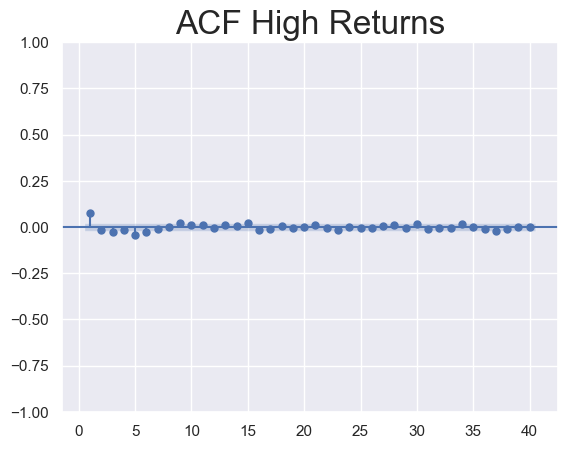

In [87]:
sgt.plot_acf(df2.returns, lags=40, zero=False)
plt.title("ACF High Returns", size=24)
plt.show()

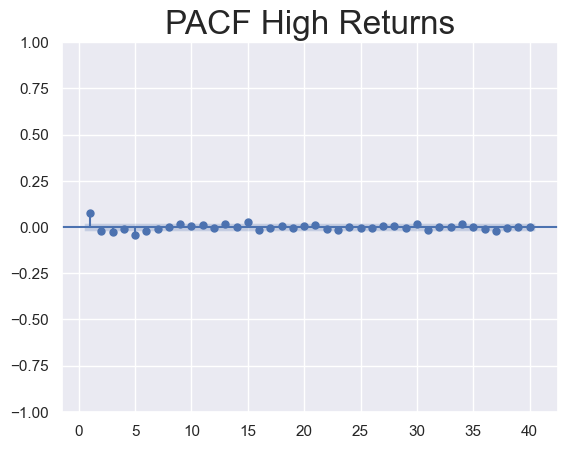

In [88]:
sgt.plot_pacf(df2.returns, lags=40, zero=False, method=('ols'))
plt.title("PACF High Returns", size=24)
plt.show()

In [9]:
#LLR test Returns
model_ret_ar = ARIMA(df2.returns, order=(1,0,0))
results_ret_ar = model_ret_ar.fit()
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -16760.413
Date:                Mon, 07 Aug 2023   AIC                          33526.826
Time:                        05:55:54   BIC                          33548.056
Sample:                    01-03-1962   HQIC                         33534.060
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.019      4.247      0.000       0.044       0.119
ar.L1          0.0752      0.008      9.639      0.000       0.060       0.091
sigma2         2.7019      0.022    122.710      0.000       2.659       2.745
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              9467.91
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.24
Prob(H) (two-sided):                  0.32   Kurtosis:                         8.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
model_ret_ar2 = ARIMA(df2.returns, order=(2,0,0))
results_ret_ar2 = model_ret_ar2.fit()
print(results_ret_ar2.summary())
print("LLR Test: " + str(LLR_test(model_ret_ar, model_ret_ar2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -16758.204
Date:                Mon, 07 Aug 2023   AIC                          33524.408
Time:                        05:58:03   BIC                          33552.715
Sample:                    01-03-1962   HQIC                         33534.054
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.019      4.340      0.000       0.045       0.118
ar.L1          0.0769      0.008      9.690      0.000       0.061       0.092
ar.L2         -0.0225      0.008     -2.844      0.0

In [13]:
model_ret_ar3 = ARIMA(df2.returns, order=(3,0,0))
results_ret_ar3 = model_ret_ar3.fit()
print(results_ret_ar3.summary())
print("LLR Test: " + str(LLR_test(model_ret_ar2, model_ret_ar3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -16755.545
Date:                Mon, 07 Aug 2023   AIC                          33521.091
Time:                        06:00:50   BIC                          33556.474
Sample:                    01-03-1962   HQIC                         33533.148
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.018      4.434      0.000       0.045       0.117
ar.L1          0.0764      0.008      9.611      0.000       0.061       0.092
ar.L2         -0.0206      0.008     -2.604      0.0

In [14]:
model_ret_ar4 = ARIMA(df2.returns, order=(4,0,0))
results_ret_ar4 = model_ret_ar4.fit()
print(results_ret_ar4.summary())
print("LLR Test: " + str(LLR_test(model_ret_ar3, model_ret_ar4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -16754.891
Date:                Mon, 07 Aug 2023   AIC                          33521.782
Time:                        06:01:25   BIC                          33564.241
Sample:                    01-03-1962   HQIC                         33536.250
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.018      4.484      0.000       0.046       0.117
ar.L1          0.0761      0.008      9.545      0.000       0.060       0.092
ar.L2         -0.0208      0.008     -2.637      0.0

In [66]:
model_ret_ar5 = ARIMA(df2.returns, order=(5,0,0))
results_ret_ar5 = model_ret_ar5.fit()
print(results_ret_ar5.summary())
print("LLR Test: " + str(LLR_test(model_ret_ar4, model_ret_ar5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -16747.608
Date:                Mon, 07 Aug 2023   AIC                          33509.215
Time:                        07:53:26   BIC                          33558.751
Sample:                    01-03-1962   HQIC                         33526.095
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.017      4.667      0.000       0.047       0.115
ar.L1          0.0756      0.008      9.431      0.000       0.060       0.091
ar.L2         -0.0218      0.008     -2.741      0.0

In [15]:
#Normalizing a data set

#Set some benchmark
benchmark = df.stock_high.iloc[0]

In [16]:
df['norm'] = df.stock_high.div(benchmark).mul(100)

C:\Users\Ryan Abe Cortez\AppData\Local\Temp\ipykernel_17080\1329525532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm'] = df.stock_high.div(benchmark).mul(100)


In [19]:
sts.adfuller(df.norm)

(-0.03796214829634779,
 0.9552777628603062,
 31,
 8717,
 {'1%': -3.431100398842246,
  '5%': -2.861871626275611,
  '10%': -2.566946519702179},
 122648.4974665104)

In [20]:
#Normalizing Returns

bench_ret = df2.returns.iloc[0]
df2['norm_ret'] = df2.returns.div(bench_ret).mul(1000)
sts.adfuller(df2.returns)

C:\Users\Ryan Abe Cortez\AppData\Local\Temp\ipykernel_17080\1528847488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['norm_ret'] = df2.returns.div(bench_ret).mul(1000)


(-40.884930592404295,
 0.0,
 5,
 8742,
 {'1%': -3.4310982522529123,
  '5%': -2.8618706777456486,
  '10%': -2.5669460147932224},
 33371.10869833498)

In [25]:
model_norm_ar_1 = ARIMA(df.norm, order=(1,1,0))
results_norm_ar_1 = model_norm_ar_1.fit()
results_norm_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   norm   No. Observations:                 8749
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -61593.693
Date:                Mon, 07 Aug 2023   AIC                         123191.387
Time:                        06:12:09   BIC                         123205.540
Sample:                    01-02-1962   HQIC                        123196.209
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0897      0.005     19.166      0.000       0.081       0.099
sigma2      7.642e+04    315.306    242.371      0.000    7.58e+04     7.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            231349.32
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):            5814.29   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
model_norm_ret_ar_1 = ARIMA(df2.norm_ret, order=(1,0,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 8748
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -64854.373
Date:                Mon, 07 Aug 2023   AIC                         129714.746
Time:                        06:11:57   BIC                         129735.976
Sample:                    01-03-1962   HQIC                        129721.980
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.8286      4.664     -4.252      0.000     -28.969     -10.688
ar.L1          0.0752      0.008      9.647      0.000       0.060       0.091
sigma2      1.609e+05   1310.692    122.785      0.000    1.58e+05    1.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              9467.83
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.24
Prob(H) (two-sided):                  0.32   Kurtosis:                         8.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model_norm_ret_ar_2 = ARIMA(df2.norm_ret, order=(2,0,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 8748
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -64852.164
Date:                Mon, 07 Aug 2023   AIC                         129712.328
Time:                        06:13:00   BIC                         129740.635
Sample:                    01-03-1962   HQIC                        129721.974
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.8286      4.565     -4.344      0.000     -28.776     -10.882
ar.L1          0.0769      0.008      9.698      0.000       0.061       0.092
ar.L2         -0.0225      0.008     -2.845      0.004      -0.038      -0.007
sigma2      1.609e+05   1311.845    122.624      0.000    1.58e+05    1.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9447.05
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.24
Prob(H) (two-sided):                  0.35   Kurtosis:                         8.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
#Analyzing the Residuals / Error Terms

df['res_price'] = results_ar4.resid

C:\Users\Ryan Abe Cortez\AppData\Local\Temp\ipykernel_17080\4161734887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_price'] = results_ar4.resid


In [44]:
df.res_price.mean()

0.001409367381862843

In [45]:
df.res_price.var()

0.02340996547903397

In [46]:
sts.adfuller(df.res_price)

(-18.02151613026878,
 2.6942981234185636e-30,
 30,
 8718,
 {'1%': -3.431100312742227,
  '5%': -2.861871588229946,
  '10%': -2.56694649945021},
 -9303.261278021404)

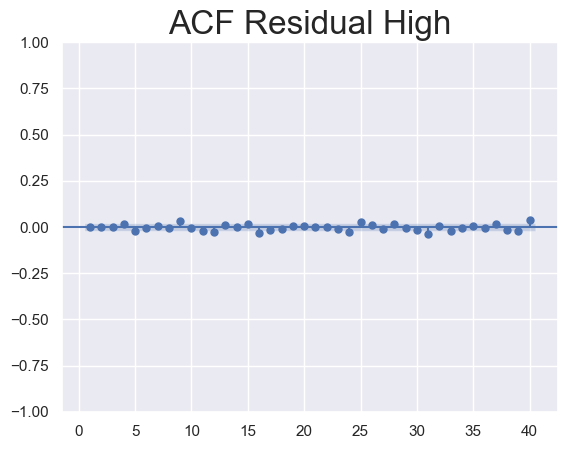

In [48]:
sgt.plot_acf(df.res_price, zero=False, lags=40)
plt.title("ACF Residual High", size=24)
plt.show()

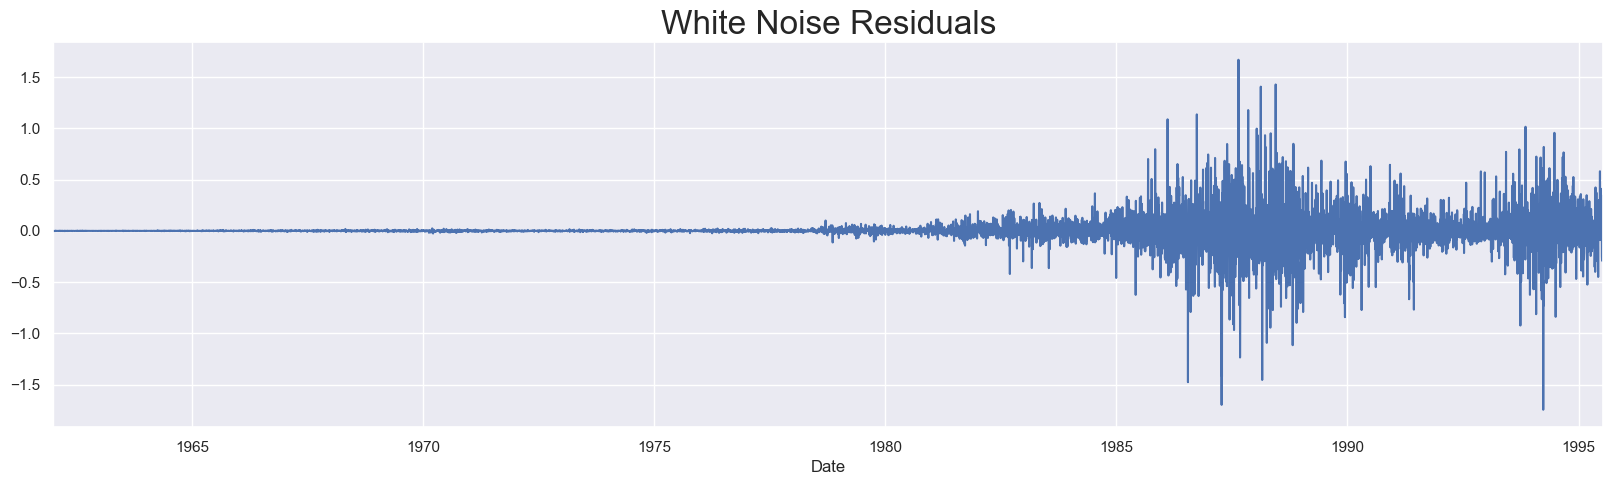

In [49]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("White Noise Residuals", size=24)
plt.show()

In [59]:
#analyzing residuals

df2['res_ret'] = results_ret_ar4.resid

C:\Users\Ryan Abe Cortez\AppData\Local\Temp\ipykernel_17080\3213753768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['res_ret'] = results_ret_ar4.resid


In [60]:
df2.res_ret.mean()

9.229794102321466e-06

In [61]:
df2.res_ret.var()

2.6987973850288323

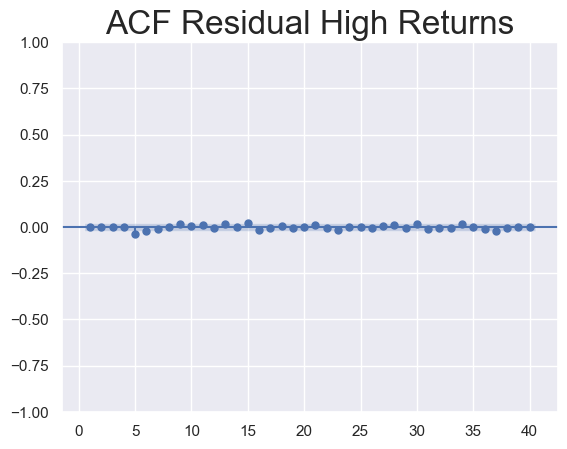

In [62]:
sgt.plot_acf(df2.res_ret, zero=False, lags=40)
plt.title("ACF Residual High Returns", size=24)
plt.show()

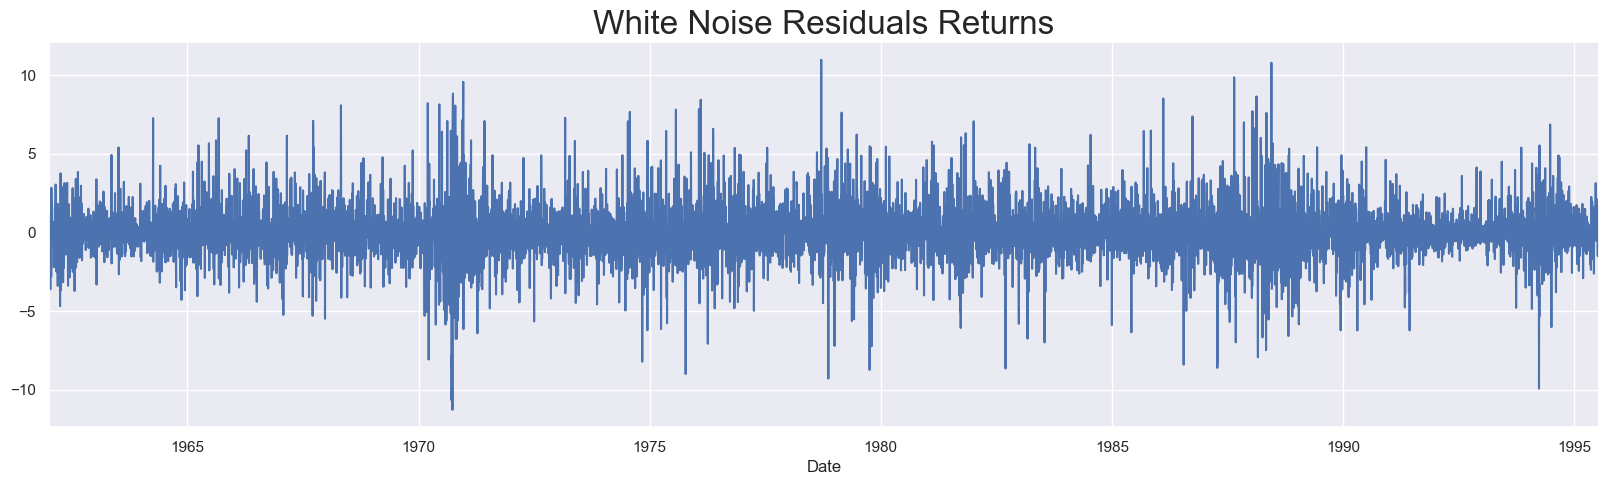

In [63]:
df2.res_ret[1:].plot(figsize=(20,5))
plt.title("White Noise Residuals Returns", size=24)
plt.show()

In [65]:
sts.adfuller(df2.res_ret)

(-40.2984795710277,
 0.0,
 5,
 8742,
 {'1%': -3.4310982522529123,
  '5%': -2.8618706777456486,
  '10%': -2.5669460147932224},
 33371.540563701776)